# STEP 10

2D Poisson Equation

Poisson's equation is obtained from adding a source term to the right-hand-side of Laplace's equation:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$
So, unlinke the Laplace equation, there is some finite value inside the field that affects the solution. Poisson's equation acts to "relax" the initial sources in the field.

In discretized form, this looks almost the same as Step 9, except for the source term:

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

Solving for the p term at point i j, we get,
$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

solve this equation by assuming an initial state of $p=0$ everywhere, and applying boundary conditions as follows:

$p=0$ at $x=0, \ 2$ and $y=0, \ 1$

and the source term consists of two initial spikes inside the domain, as follows:

$b_{i,j}=100$ at $i=\frac{1}{4}nx, j=\frac{1}{4}ny$

$b_{i,j}=-100$ at $i=\frac{3}{4}nx, j=\frac{3}{4}ny$

$b_{i,j}=0$ everywhere else.

In [2]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
nx=50
ny=50
nt=100
x=numpy.linspace(0,2,nx)
y=numpy.linspace(0,1,ny)
dx=2/(nx-1)
dy=1/(ny-1)
p=numpy.zeros((ny,nx))
pd=numpy.zeros((ny,nx))
b=numpy.zeros((ny,nx))
b[int(ny/4),int(nx/4)]=100
b[int((3*ny)/4),int((3*nx)/4)]=-100

In [8]:
for t in range(nt):
    pd=p.copy()
    p[1:-1,1:-1]=(((pd[1:-1,2:]+pd[1:-1,:-2])*dy**2)+((pd[2:,1:-1]+pd[:-2,1:-1])*dx**2)-(b[1:-1,1:-1]*(dx**2)*(dy**2)))/(2*((dx**2)+(dy**2)))
    p[0,:]=0
    p[ny-1,:]=0
    p[:,0]=0
    p[:,nx-1]=0

In [9]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

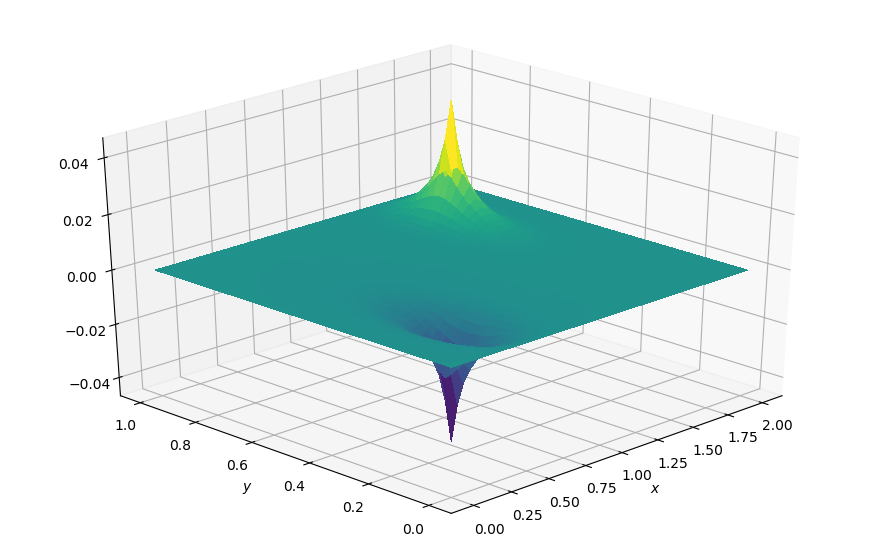

In [10]:
plot2D(x, y, p)